In [3]:
import pandas as pd
import numpy as np

In [38]:
train=pd.read_csv('Loan_Dataset_train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})
train.isnull().sum()                

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
test=pd.read_csv('Loan_Dataset_test.csv')
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

C:\Users\shree\AppData\Local\Temp\ipykernel_3024\3270637892.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Rural  
2             1.0         Urban  
3             1.0         Urban  
4             1.0         Urban

In [44]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  954.000000        961.000000   
mean       5179.795107        1601.916330  142.511530        342.201873   
std        5695.104533        2718.772806   77.421743         65.100602   
min           0.000000           0.000000    9.000000          6.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      902.000000  
mean         0.835920  
std          0.370553  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [45]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [46]:
data.Dependents.dtypes

dtype('O')

<AxesSubplot:>

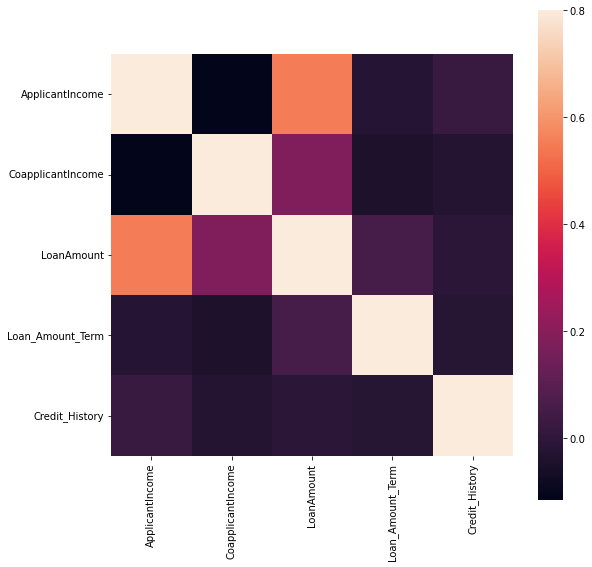

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [48]:
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

<AxesSubplot:>

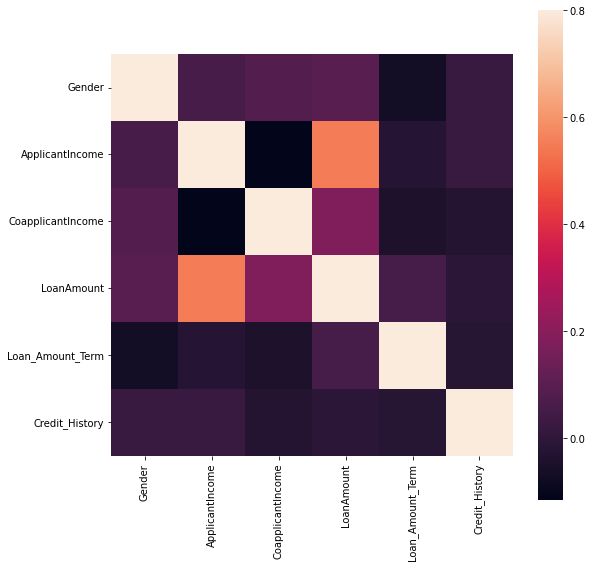

In [49]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [50]:
data.Married=data.Married.map({'Yes':1,'No':0})
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [51]:
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
3.0     91
Name: Dependents, dtype: int64

<AxesSubplot:>

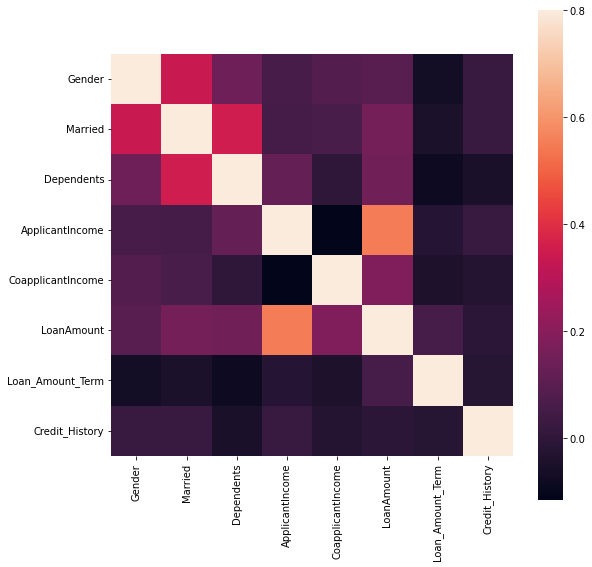

In [52]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [53]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [54]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [55]:
data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [56]:
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

<AxesSubplot:>

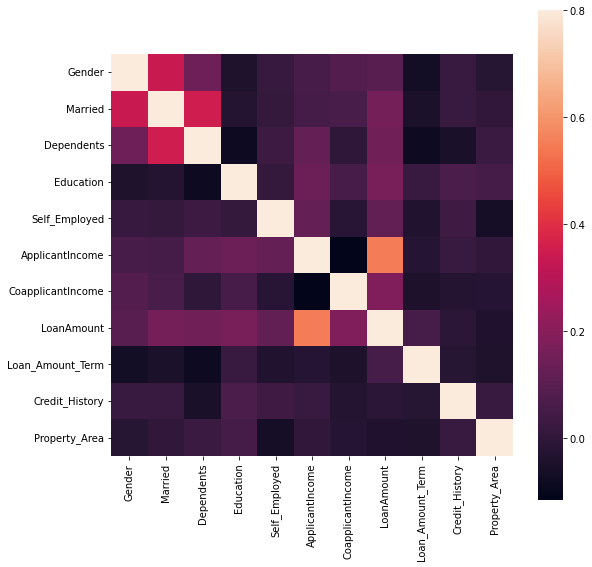

In [57]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))

sns.heatmap(corrmat,vmax=.8,square=True)

In [58]:
data.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002     1.0      0.0         0.0          1            0.0   
1  LP001003     1.0      1.0         1.0          1            0.0   
2  LP001005     1.0      1.0         0.0          1            1.0   
3  LP001006     1.0      1.0         0.0          0            0.0   
4  LP001008     1.0      0.0         0.0          1            0.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  
0             1.0              2  
1             1.0              0  
2             1.0              2  
3             1.0              2  
4             1.0              2

In [59]:
data.Credit_History.size

981

In [60]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [61]:
data.Married.fillna(np.random.randint(0,2),inplace=True)
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [62]:
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [63]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [64]:
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)
data.Gender.value_counts()

1.0    799
0.0    182
Name: Gender, dtype: int64

In [65]:
data.Dependents.fillna(data.Dependents.median(),inplace=True)
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

<AxesSubplot:>

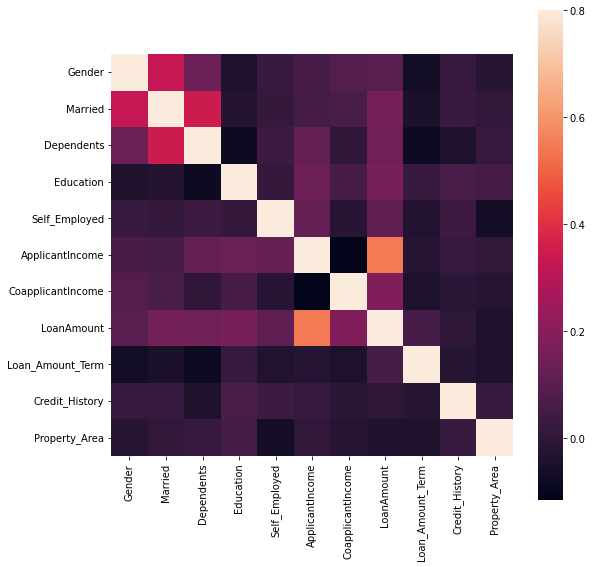

In [66]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [67]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [68]:
data.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002     1.0      0.0         0.0          1            0.0   
1  LP001003     1.0      1.0         1.0          1            0.0   
2  LP001005     1.0      1.0         0.0          1            1.0   
3  LP001006     1.0      1.0         0.0          0            0.0   
4  LP001008     1.0      0.0         0.0          1            0.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       126.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  
0             1.0              2  
1             1.0              0  
2             1.0              2  
3             1.0              2  
4             1.0              2

In [69]:
data.drop('Loan_ID',inplace=True,axis=1)
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [70]:
train_X=data.iloc[:614,]
train_y=Loan_status
X_test=data.iloc[614:,]
seed=7

In [71]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=seed)

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [73]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [74]:
seed=7
scoring='accuracy'

In [75]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [76]:
for name,model in models:
    
    kfold=KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=LogisticRegression()
svc.fit(train_X,train_y)
pred=svc.predict(test_X)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8246753246753247
[[ 23  25]
 [  2 104]]
              precision    recall  f1-score   support

           0       0.92      0.48      0.63        48
           1       0.81      0.98      0.89       106

    accuracy                           0.82       154
   macro avg       0.86      0.73      0.76       154
weighted avg       0.84      0.82      0.81       154



C:\Users\shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
df_output=pd.DataFrame()

In [79]:
outp=svc.predict(X_test).astype(int)
outp

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [81]:
df_output['Loan_ID']=Loan_ID
df_output['Loan_Status']=outp

In [82]:
df_output.head()

Loan_ID  Loan_Status
0  LP001015            1
1  LP001022            1
2  LP001031            1
3  LP001035            1
4  LP001051            1

In [84]:
df_output[['Loan_ID','Loan_Status']].to_csv('Loan_Dataset_Output.csv',index=False)